In [1]:
from cmb.configs.experiments import Configs
from cmb.datasets.jetclass import JetsClassData

config = Configs('epic_hybrid.yaml') 
jets = JetsClassData(config.data)

INFO: created experiment instance beta-gauss_to_tops_ConditionalMarkovBridge_HybridEPiC_2024.09.28_17h38


## JetClass data

In [2]:
(jets.target.continuous.shape, 
jets.source.continuous.shape, 
jets.target.discrete.shape,
jets.source.discrete.shape,  
jets.target.mask.shape,
jets.source.mask.shape)

(torch.Size([100000, 128, 3]),
 torch.Size([100000, 128, 3]),
 torch.Size([100000, 128, 1]),
 torch.Size([100000, 128, 1]),
 torch.Size([100000, 128, 1]),
 torch.Size([100000, 128, 1]))

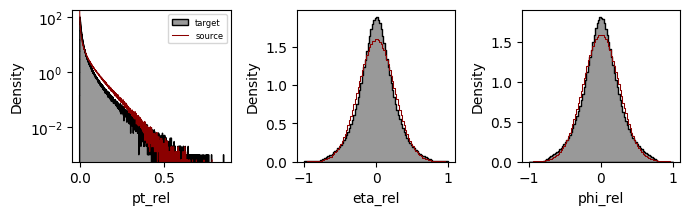

In [7]:
mask_target = (jets.target.mask > 0).squeeze() 
mask_source= (jets.source.mask > 0).squeeze() 

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,3, figsize=(7,2.25))
jets.target.histplot('pt_rel', mask=mask_target, ax=ax[0], stat='density', log_scale=(False,True), color='k', alpha=0.4, label='target')
jets.source.histplot('pt_rel', mask=mask_source, ax=ax[0], stat='density',  log_scale=(False,True), color='darkred', fill=False, lw=0.75, label='source')
jets.target.histplot('eta_rel', mask=mask_target, binrange=(-1,1), binwidth=0.02,ax=ax[1], stat='density',  color='k', alpha=0.4, label='target')
jets.source.histplot('eta_rel', mask=mask_source, binrange=(-1,1), binwidth=0.02, ax=ax[1], stat='density',  color='darkred', fill=False, lw=0.75, label='source')
jets.target.histplot('phi_rel', mask=mask_target, binrange=(-1,1), binwidth=0.02, ax=ax[2], stat='density', color='k', alpha=0.4, label='target')
jets.source.histplot('phi_rel', mask=mask_source, binrange=(-1,1), binwidth=0.02,ax=ax[2], stat='density',  color='darkred', fill=False, lw=0.75, label='source')
ax[0].legend(fontsize=6)
plt.tight_layout()
plt.show()

(None, None)

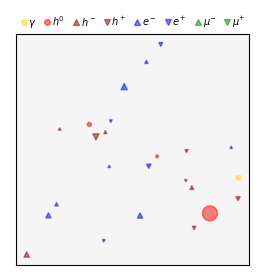

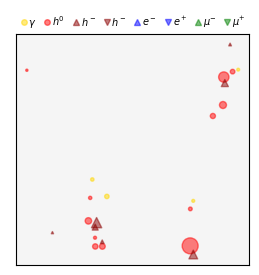

In [3]:
jets.source.display_cloud(idx=10,  scale_marker=200.0), jets.target.display_cloud(idx=10,  scale_marker=200.0)


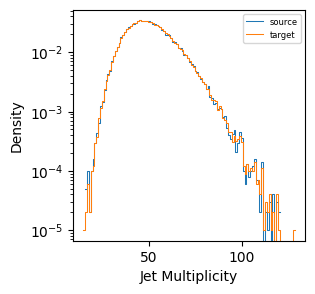

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,1,figsize=(3,3))
sns.histplot(jets.source.multiplicity, element="step", fill=False, discrete=True, lw=0.75, stat='density', log_scale=(False, True),  ax=ax, label='source')
sns.histplot(jets.target.multiplicity, element="step", fill=False, discrete=True, lw=0.75, stat='density', log_scale=(False, True),  ax=ax, label='target')
ax.legend(fontsize=6)
ax.set_xlabel('Jet Multiplicity')
plt.show()

RuntimeError: The size of tensor a (128) must match the size of tensor b (100000) at non-singleton dimension 1

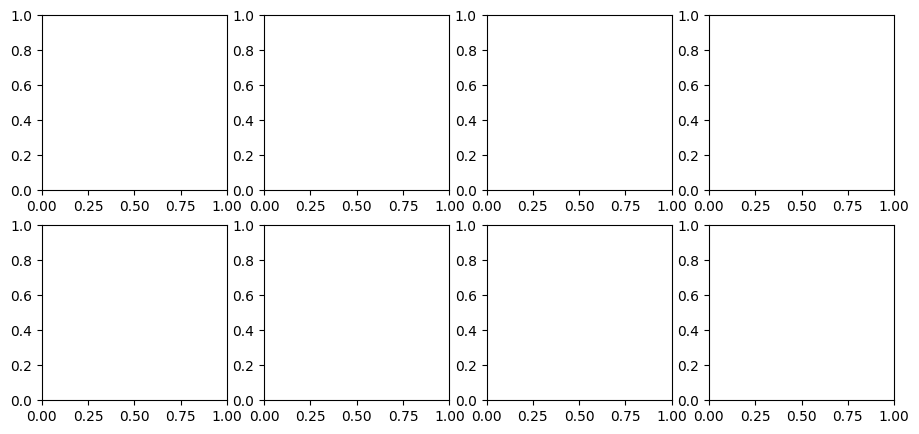

In [12]:
fig, ax = plt.subplots(2, 4, figsize=(11,5))

dic = {0:r'$\gamma$', 
       1:r'$h^0$', 
       2:r'$h^-$', 
       3:r'$h^+$', 
       4:r'$e^-$', 
       5:r'$e^+$', 
       6:r'$\mu^-$', 
       7:r'$\mu^+$'}

mask_target = (jets.target.mask > 0).squeeze() 
mask_source= (jets.source.mask > 0).squeeze() 

for n in [0,1,2,3]:
    target_counts = (jets.target.discrete == n) * mask_target.squeeze(-1)
    target_counts = target_counts.sum(dim=1)
    source_counts = (jets.source.discrete == n) * mask_source.squeeze(-1)
    source_counts = source_counts.sum(dim=1)

    sns.histplot(target_counts, ax=ax[0,n], element="step", fill=False, discrete=True, lw=0.75, stat='density', log_scale=(False, True),  label='target')
    sns.histplot(source_counts,ax=ax[0,n], element="step", fill=False, discrete=True, lw=0.75, stat='density', log_scale=(False, True),   label='source')
    
    ax[0,n].set_xlabel(f'{dic[n]} multiplicities')
    
for n in [0,1,2,3]:
    target_counts = (jets.target.discrete == 4+n).sum(dim=1)
    source_counts = (jets.source.discrete == 4+n).sum(dim=1)

    sns.histplot(target_counts,  ax=ax[1,n], element="step", fill=False, discrete=True, lw=0.75, stat='density', log_scale=(False, True), label='target')
    sns.histplot(source_counts,  ax=ax[1,n], element="step", fill=False, discrete=True, lw=0.75, stat='density', log_scale=(False, True), label='source')

    ax[1,n].set_xlabel(f'{dic[4+n]} multiplicities')

ax[0,0].legend(loc='upper right', fontsize=8)
plt.tight_layout()
plt.show()

## Train CMB

In [ ]:
from cmb.models.trainers import GenerativeDynamicsModule
epic_cmb = GenerativeDynamicsModule(config, jets)
epic_cmb.train()

# Inference

### load trained model

In [1]:
from cmb.models.trainers import GenerativeDynamicsModule

path='/home/df630/CMB/results/JetClass/beta-gauss_to_tops_ConditionalMarkovBridge_HybridEPiC_2024.09.28_18h03/config.yaml'
epic_cmb = GenerativeDynamicsModule(config=path)
epic_cmb.load()


2024-09-28 18:13:33.151983: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-28 18:13:33.197590: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-28 18:13:33.199577: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-28 18:13:33.907857: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


INFO: Conditional Markov Bridge initialized...
      - continuous process:  FlowMatching
      - discrete process:  TelegraphProcess
      - solver method:  EulerLeapingSolver
      - model: HybridEPiC
INFO: loading `best` epoch checkpoint from:
  - /home/df630/CMB/results/JetClass/beta-gauss_to_tops_ConditionalMarkovBridge_HybridEPiC_2024.09.28_18h03/best_epoch_model.pth


### Generate data

In [4]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from cmb.datasets.jetclass import JetsClassData
from cmb.datasets.jetclass import ParticleClouds

epic_cmb.config.data.source.test.num_jets = 2300
test = JetsClassData(epic_cmb.config.data, test=True)

epic_cmb.generate(source_continuous=test.source.continuous, 
                  source_discrete=test.source.discrete,
                  mask=test.source.mask)


AssertionError: 

In [5]:
sample = ParticleClouds(epic_cmb.sample, min_num_particles=0, max_num_particles=128, discrete_features=True) 

## Plot results

In [6]:
args_sam = {'stat':'density', 'log_scale':(False, True), 'fill':False, 'color':'darkred', 'lw':0.75, 'label':'t=1'}
args_tar = {'stat':'density', 'log_scale':(False, True), 'fill':True, 'color':'k','lw':0.3, 'alpha':0.2, 'label':'target'}
args_src = {'stat':'density', 'log_scale':(False, True), 'fill':False, 'color':'darkblue','lw':0.75, 'label':'t=0'}

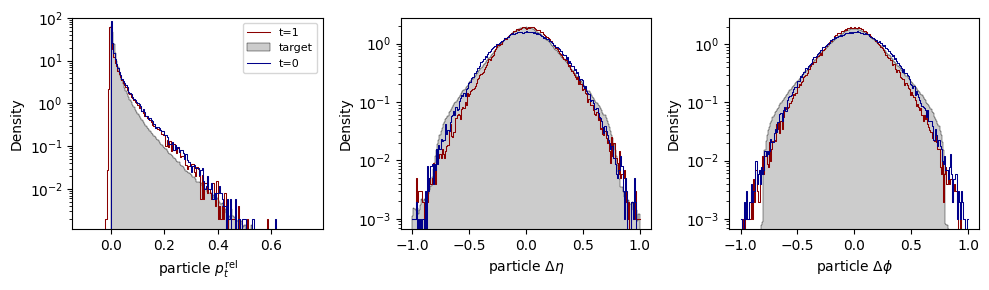

In [7]:
mask_target = (test.target.mask > 0).squeeze() 
mask_source= (test.source.mask > 0).squeeze() 
mask_sample = (sample.mask > 0).squeeze()

fig, ax = plt.subplots(1, 3, figsize=(10,3))

sample.histplot('pt_rel', mask=mask_sample, binrange=(-.1, .75), binwidth=0.005, xlabel=r'particle $p_t^{\rm rel}$', ax=ax[0], **args_sam)
test.target.histplot('pt_rel', mask=mask_target,  binrange=(-.1, .75), binwidth=0.005, xlabel=r'particle $p_t^{\rm rel}$',ax=ax[0], **args_tar)
test.source.histplot('pt_rel', mask=mask_source,  binrange=(-.1, .75), binwidth=0.005, xlabel=r'particle $p_t^{\rm rel}$',ax=ax[0], **args_src)

sample.histplot('eta_rel', mask=mask_sample, binrange=(-1, 1), binwidth=0.01, xlabel=r'particle $\Delta \eta$', ax=ax[1], **args_sam)
test.target.histplot('eta_rel', mask=mask_target,  binrange=(-1, 1), binwidth=0.01, xlabel=r'particle $\Delta \eta$', ax=ax[1],  **args_tar)
test.source.histplot('eta_rel', mask=mask_source, binrange=(-1, 1), binwidth=0.01, xlabel=r'particle $\Delta \eta$', ax=ax[1],  **args_src)

sample.histplot('phi_rel', mask=mask_sample, binrange=(-1, 1), binwidth=0.01, xlabel=r'particle $\Delta \phi$', ax=ax[2], **args_sam)
test.target.histplot('phi_rel', mask=mask_target,  binrange=(-1, 1), binwidth=0.01, xlabel=r'particle $\Delta \phi$', ax=ax[2],  **args_tar)
test.source.histplot('phi_rel', mask=mask_source, binrange=(-1, 1), binwidth=0.01, xlabel=r'particle $\Delta \phi$', ax=ax[2],  **args_src)

ax[0].legend(loc='upper right', fontsize=8)
plt.tight_layout()
plt.savefig(epic_cmb.workdir / 'particle_distributions.png')
plt.show()

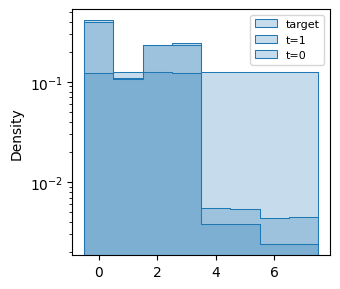

In [8]:


fig, ax = plt.subplots(1, 1, figsize=(3.5,3))
sns.histplot(test.target.discrete[mask_target], discrete=True, element='step', color='k', lw=0.75, stat='density', log_scale=(False, True), label='target')
sns.histplot(sample.discrete[mask_sample], discrete=True, element='step', color='darkred', lw=0.75, stat='density', log_scale=(False, True), label='t=1')
sns.histplot(test.source.discrete[mask_source], discrete=True, element='step', color='darkblue', lw=0.75, stat='density', log_scale=(False, True), label='t=0')
ax.legend(loc='upper right', fontsize=8)
plt.tight_layout()
plt.savefig(epic_cmb.workdir / 'flavor_fraction.png')
plt.show()

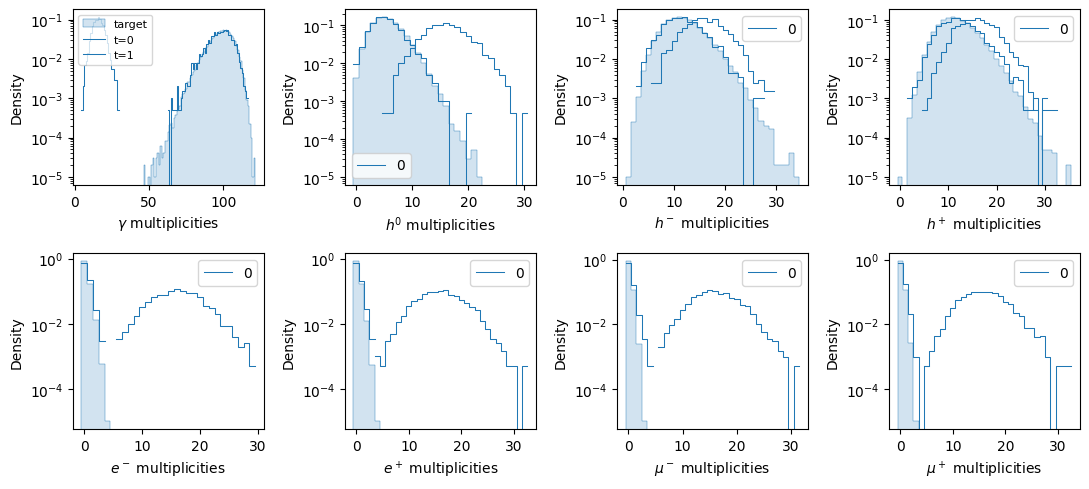

In [9]:
fig, ax = plt.subplots(2, 4, figsize=(11,5))

dic = {0:r'$\gamma$', 1:r'$h^0$', 2:r'$h^-$', 3:r'$h^+$', 4:r'$e^-$', 5:r'$e^+$', 6:r'$\mu^-$', 7:r'$\mu^+$'}

for n in [0,1,2,3]:
    sample_counts = (sample.discrete== n) 
    sample_counts = sample_counts.sum(dim=1)

    target_counts = (test.target.discrete== n) 
    target_counts = target_counts.sum(dim=1)

    source_counts = (test.source.discrete == n) 
    source_counts = source_counts.sum(dim=1)

    sns.histplot(target_counts, discrete=True, ax=ax[0,n], element='step', **args_tar)
    sns.histplot(source_counts, discrete=True, ax=ax[0,n], element='step', **args_src)
    sns.histplot(sample_counts, discrete=True, ax=ax[0,n], element='step', **args_sam)
    
    ax[0,n].set_xlabel(f'{dic[n]} multiplicities')
    
for n in [0,1,2,3]:
    sample_counts = (sample.discrete == 4+n).sum(dim=1)
    target_counts = (test.target.discrete == 4+n).sum(dim=1)
    source_counts = (test.source.discrete == 4+n).sum(dim=1)

    sns.histplot(target_counts, discrete=True, ax=ax[1,n], element='step', **args_tar)
    sns.histplot(source_counts, discrete=True, ax=ax[1,n], element='step', **args_src)
    sns.histplot(sample_counts, discrete=True, ax=ax[1,n], element='step', **args_sam)

    ax[1,n].set_xlabel(f'{dic[4+n]} multiplicities')

ax[0,0].legend(loc='upper left', fontsize=8)
plt.tight_layout()
plt.savefig(epic_cmb.workdir / 'flavor_fraction.png')
plt.show()

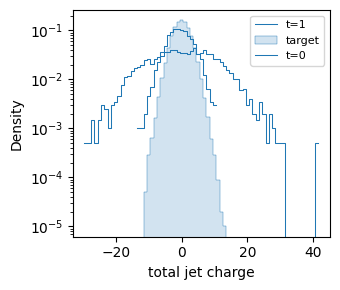

In [10]:
sample_total_charge = (sample.discrete == 2).sum(dim=1) - (sample.discrete == 3).sum(dim=1) + (sample.discrete == 4).sum(dim=1) - (sample.discrete == 5).sum(dim=1) + (sample.discrete == 6).sum(dim=1) - (sample.discrete == 7).sum(dim=1)
target_total_charge = (test.target.discrete == 2).sum(dim=1) - (test.target.discrete == 3).sum(dim=1) + (test.target.discrete == 4).sum(dim=1) - (test.target.discrete == 5).sum(dim=1) + (test.target.discrete == 6).sum(dim=1) - (test.target.discrete == 7).sum(dim=1)
source_total_charge = (test.source.discrete == 2).sum(dim=1) - (test.source.discrete == 3).sum(dim=1) + (test.source.discrete == 4).sum(dim=1) - (test.source.discrete == 5).sum(dim=1) + (test.source.discrete == 6).sum(dim=1) - (test.source.discrete == 7).sum(dim=1)

fig, ax = plt.subplots(1, 1, figsize=(3.5,3))
sns.histplot(sample_total_charge, discrete=True, element='step', **args_sam)
sns.histplot(target_total_charge, discrete=True, element='step', **args_tar)
sns.histplot(source_total_charge, discrete=True, element='step', **args_src)
ax.set_xlabel('total jet charge')
ax.legend(loc='upper right', fontsize=8)
plt.tight_layout()
plt.savefig(epic_cmb.workdir / 'total_jet_charge.png')
plt.show()


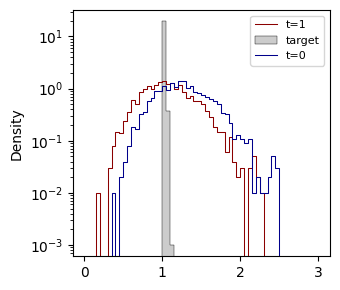

In [11]:
sample_jet_pt = sample.continuous[...,0].sum(dim=1)
target_jet_pt = test.target.continuous[...,0].sum(dim=1)
source_jet_pt = test.source.continuous[...,0].sum(dim=1)

fig, ax = plt.subplots(1, 1, figsize=(3.5,3))
sns.histplot(sample_jet_pt, binrange=(0., 3), binwidth=0.05, element='step', **args_sam)
sns.histplot(target_jet_pt, binrange=(0., 3), binwidth=0.05, element='step', **args_tar)
sns.histplot(source_jet_pt, binrange=(0., 3), binwidth=0.05, element='step', **args_src)
ax.legend(loc='upper right', fontsize=8)

plt.tight_layout()
plt.savefig(epic_cmb.workdir / 'jet_pt.png')
plt.show()